In [1]:
#Processing Mixed Breed Data.ipynb
#Jennifer Mince, Julia Goyco, Zoe Lambert, Stephanie Schoch
#COSC480 Deep Learning final project repository for image recognition of dog breeds: 
#    Can we use a deep learning approach to determine the two predominant breeds in a mixed-breed dog?
#Need the mixed_train_labels.csv and mixed_test_labels.csv if you need to recreate the image and label files created by the program
#the files are already saved on the Google Drive, or GitHub, and can be accessed there as well
#12/3/2018

#steps: each breed needs a number read labels.csv and assosciate with images

In [2]:
#imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from keras.preprocessing import image
import os, sys

C:\Users\jmince\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
#read labels.csv training data
data = pd.read_csv("mixed_train_labels.csv") 
# saves the images names to pic_names and saves breed to pic_breed
pic_Names= data["id"]
pic_breed = data[" breed"]

#saves a list of unique breeds from labels.csv
unique_Breed = pic_breed.unique()

In [4]:
X_data = []
Y_data = []
# saves the train images to X_data and labels as integers as Y_data. 
#also resizes all the images to a consistant size of 224 X 224
for i in range(pic_Names.shape[0]):
    myFile = "Mixed-Breed Dog images/train/" + pic_Names[i] + ".jpg" #looks at each image 
    img = image.load_img(myFile, target_size=(224, 224)) #target size makes all images the same size
    res = image.img_to_array(img) #puts the images to an array for our training and testing later
    X_data.append(res) #add to X_data
    breedID = np.nonzero(unique_Breed == pic_breed[i]) #assign the breedID 
    Y_data.append(breedID[0][0]) #add to Y_data
    
#print out image
print('X_data shape:', np.array(X_data).shape) 
print('Y_data shape:', np.array(Y_data).shape)
#store results
np.save("Mixed_train_images", X_data)
np.save("Mixed_train_labels", Y_data)

X_data shape: (278, 224, 224, 3)
Y_data shape: (278,)


 golden_saint


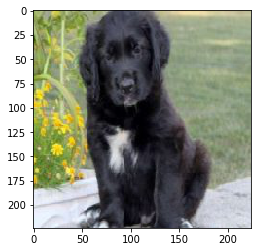

In [5]:
# shows what the results are using index i
i = 4;
print(unique_Breed[Y_data[i]])
pic = X_data[i]/255
plt.imshow(pic)
plt.show()

In [6]:
#read labels.csv testing data 
data = pd.read_csv("mixed_test_labels.csv") 
# saves the images names to pic_names and saves breed to pic_breed
pic_Names= data["id"]
pic_breed = data["breed"]
#saves a list of unique breeds from labels.csv
unique_Breed_test = pic_breed.unique()

In [7]:
X_test_data = []
Y_test_data = []

# saves the test images to X_data and labels as integers as Y_data. 
#also resizes all the images to a consistant size of 224 X 224
for i in range(pic_Names.shape[0]):
    myFile = "Mixed-Breed Dog images/test/" + pic_Names[i] + ".jpg"      
    img = image.load_img(myFile, target_size=(224, 224))
    res = image.img_to_array(img)  #puts the images to an array for our training and testing later
    X_test_data.append(res)
    breedID = np.nonzero(unique_Breed == pic_breed[i])
    Y_test_data.append(breedID[0][0])
    
print('X_test_data shape:', np.array(X_test_data).shape)
print('Y_test_data shape:', np.array(Y_test_data).shape)
np.save("Mixed_test_images", X_test_data)
np.save("Mixed_test_labels", Y_test_data)

IndexError: index 0 is out of bounds for axis 0 with size 0

In [ ]:
# shows what the results are using index i
i = 4;
print(unique_Breed_test[Y_test_data[i]])
pic = X_test_data[i]/255
plt.imshow(pic)
plt.show()